In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

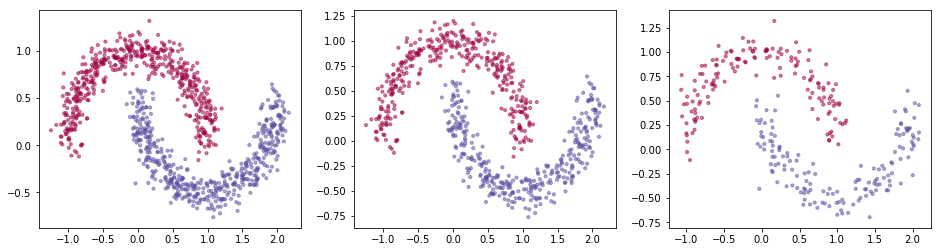

In [2]:
X_sample, Y_sample = make_moons(1000, noise=0.1)
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample, test_size=0.3)

Y_train = Y_train.reshape((len(Y_train),1))
Y_test = Y_test.reshape((len(Y_test),1))

f, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].scatter(X_sample[:, 0], X_sample[:, 1], s=10, c=Y_sample, cmap=plt.cm.Spectral, alpha=0.5)
ax[1].scatter(X_train[:, 0], X_train[:, 1], s=10, c=Y_train, cmap=plt.cm.Spectral, alpha=0.5)
ax[2].scatter(X_test[:, 0], X_test[:, 1], s=10, c=Y_test, cmap=plt.cm.Spectral, alpha=0.5)
plt.show()

In [9]:
def bias_extend(X):
    bias = np.ones((X.shape[0], 1))
    X_ext = np.append(bias, X, axis=1)
    return X_ext

def weighted_sum(X_ext, W):
    return np.matmul(X_ext, W)

def activate(Z):
    output = 1 / (1 + np.exp(-Z)) # sigmoid
    return output 

def derivative(output):
    return output*(1 - output) # derivative of sigmoid 

def feedforward(X, W):
    X_ext = bias_extend(X)
    Z = weighted_sum(X_ext, W)
    Y_output = activate(Z)
    return Y_output

def predict(X, W):
    Y_output = feedforward(X, W)
    return np.round(Y_output)

def accuracy(binary_output, Y):
    return sum(binary_output == Y) / len(Y) 

def cost(output, Y):
    error = output - Y
    return 0.5*np.dot(error.T, error)

In [16]:
0.5*np.dot(error.T, error)[0]

array([ 30.96469859])

Initial weight = [[ 1.3440523 ]
 [-0.0803553 ]
 [-2.01884446]]


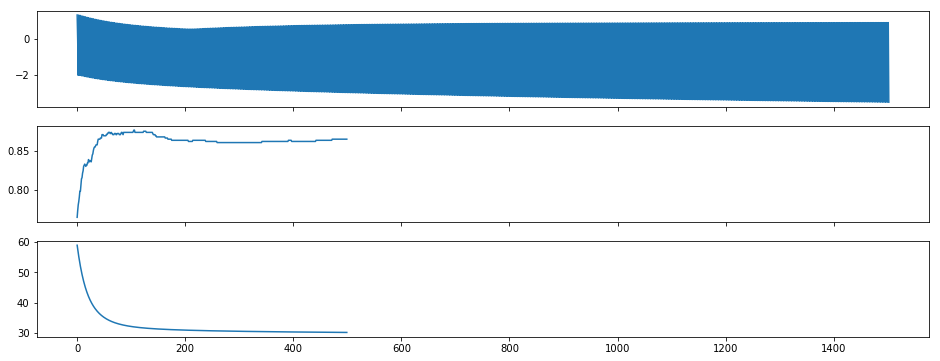

Final weight = [[ 0.38491186]
 [ 0.91757629]
 [-3.51720109]]

Training accuracy = 0.864
Test accuracy = 0.910


In [18]:
# train
beta = 0.0001
n_epoch = 5000
W = np.random.randn(3, 1)
print('Initial weight =', W)

W_hist = W
acc_hist = []
cost_hist = []
unit = 10
for epoch in range(n_epoch): 
    X_ext = bias_extend(X_train)
    Y_output = feedforward(X_train, W)
    error = Y_train - Y_output
    Y_derivative = derivative(Y_output)
    
    W += beta * np.matmul(X_ext.T, Y_derivative*error)
    
    if epoch % unit ==0:
        W_hist = np.append(W_hist, W, axis=0)
        Y_predict = predict(X_train, W)
        acc_hist.append(accuracy(Y_predict, Y_train))
        cost_hist.append(cost(Y_output, Y_train)[0])
    
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 6), sharex=True)
ax1.plot(W_hist)
ax2.plot(acc_hist)
ax3.plot(cost_hist)
plt.show()

print('Final weight =', W)
print()
print('Training accuracy = %.3f' %accuracy(predict(X_train, W), Y_train))
print('Test accuracy = %.3f' %accuracy(predict(X_test, W), Y_test))

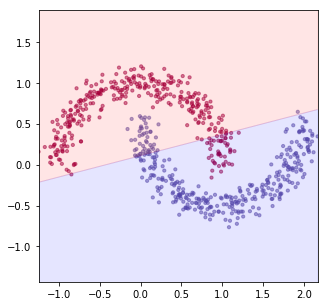

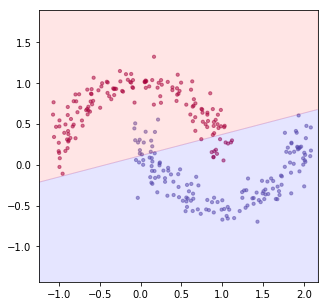

In [19]:
# calculate a separation line slope and intercept
slope = -W[1] / W[2]
intercept = -W[0] / W[2]
x1_min = min(X_train[:, 0])
x1_max = max(X_train[:, 0])
x2_min = min(X_train[:, 1])
x2_max = max(X_train[:, 1])


# Train set
plt.figure(figsize=(5,5))
plt.scatter(X_train[:, 0], X_train[:, 1], s=10, c=Y_train, cmap=plt.cm.Spectral, alpha=0.5)
X1 = np.linspace(x1_min, x1_max, 100)
X2 = slope*X1 + intercept
plt.fill_between(X1, X2, X2-100, color='b', alpha=0.1)
plt.fill_between(X1, X2, X2+100, color='r', alpha=0.1)
plt.axis('equal')
plt.xlim(min(X1), max(X1))
plt.ylim(min(X2), max(X2))
plt.show()


# Test set
plt.figure(figsize=(5,5))
plt.scatter(X_test[:, 0], X_test[:, 1], s=10, c=Y_test, cmap=plt.cm.Spectral, alpha=0.5)
plt.fill_between(X1, X2, X2-100, color='b', alpha=0.1)
plt.fill_between(X1, X2, X2+100, color='r', alpha=0.1)
plt.axis('equal')
plt.xlim(min(X1), max(X1))
plt.ylim(min(X2), max(X2))
plt.show()


In [20]:
def bias_extend(X):
    bias = np.ones((X.shape[0], 1))
    X_ext = np.append(bias, X, axis=1)
    return X_ext

def mat_multiply(mat, weight):
    return np.matmul(mat, weight)
    
def activate(Z):
    output = 1 / (1 + np.exp(-Z)) # sigmoid
    return output 

def derivative(output):
    return output*(1 - output) # derivative of sigmoid 

def feedforward(X, W1, W2):
    X_ext = bias_extend(X)
    H = activate(mat_multiply(X_ext, W1))
    Y_output = activate(mat_multiply(H, W2))
    return Y_output

def predict(X, W1, W2):
    Y_output = feedforward(X, W1, W2)
    binary_output = np.round(Y_output)
    return binary_output

def accuracy(binary_output, Y):
    return sum((binary_output[:,0] == Y[:,0])) / len(Y) 

def cost(output, Y):
    error = output - Y
    return 0.5*np.dot(error, error)

In [24]:
dim_input = 3
dim_hidden = 3
dim_output = 1

W1 = np.random.randn(dim_input, dim_hidden)
W2 = np.random.randn(dim_hidden, dim_output)
print(accuracy(predict(X_train, W1, W2), Y_train))

beta = 0.01
n_epoch = 10000

for epoch in range(n_epoch):
    
    Y_output = feedforward(X_train, W1, W2) # [n_data, 1]
    Error = Y_output - Y_train # [n_data, 1]
    Delta2 = Error * Y_output * (1 - Y_output) # element-wise multiplication: [n_data, 1]
    
    X_ext = bias_extend(X_train) # [n_data, 3]
    H = activate(mat_multiply(X_ext, W1)) # [n_data, 2]
    
    dW2 = np.matmul(H.T, Delta2) # [2, 1]
      
    Delta1 = np.matmul(Delta2, W2.T) * H * (1 - H) # [n_data, 2]
    dW1 = np.matmul(X_ext.T, Delta1)
    
    # update
    W2 += -beta * dW2
    W1 += -beta * dW1
    
    
print(accuracy(predict(X_train, W1, W2), Y_train))
print(accuracy(predict(X_test, W1, W2), Y_test))

0.5
1.0
0.996666666667


In [ ]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

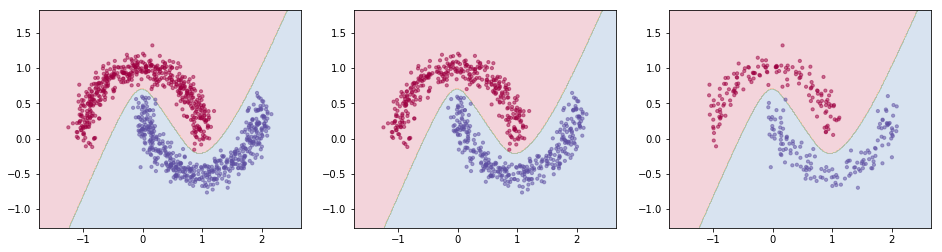

In [41]:
x_min, x_max = X_sample[:, 0].min() - .5, X_sample[:, 0].max() + .5
y_min, y_max = X_sample[:, 1].min() - .5, X_sample[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(X_grid, W1, W2)
Z = Z.reshape(xx.shape)


f, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)
ax[0].scatter(X_sample[:, 0], X_sample[:, 1], s=10, c=Y_sample, cmap=plt.cm.Spectral, alpha=0.5)
ax[1].contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)
ax[1].scatter(X_train[:, 0], X_train[:, 1], s=10, c=Y_train, cmap=plt.cm.Spectral, alpha=0.5)
ax[2].contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)
ax[2].scatter(X_test[:, 0], X_test[:, 1], s=10, c=Y_test, cmap=plt.cm.Spectral, alpha=0.5)
plt.show()

(136578, 1)